<a href="https://colab.research.google.com/github/dafon1986/Elecciones/blob/main/Trabajo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **La incidencia de los asesinatos policiales en las elecciones de Estados Unidos: análisis de los periodos electorales 2016 y 2020**

El presente trabajo tiene como objeto realizar una análisis de la posible incidencia de los asesinatos policiales en Estados Unidos en las elecciones presidenciales de los años 2016 y 2020. 

El asesinato de George Floyd, ciudadano afroamericano, por
parte la policía de la cuidad de Minneapolis en Minnesota, y las masivas protestas y manifestaciones que este hecho criminal desencadenó, es un
ejemplo de que el racismo y la discriminación, son algunos de los ejes de mayor incidencia en la forma de estructuración del conflicto social y político en Estados Unidos.

El caso de Floyd no fue el único; y en los últimos años bajo el gobierno de Donald Trump, se cometieron multiples asesinatos que tuvieron una amplia cobertura. Estos despertaron en un sector de la población un fuerte repudio hacia el presidente de turno y su gestión. El deceso de George desencadenó una campaña de activismo social impulsando a la población a votar y hacer escuchar sus voces en las urnas. 

Integrantes: Juan Manuel Da Fonseca, Ramiro Gandura, Ariana Karin, Diego Chavez y Magdalena Germano.

In [1]:
!pip install plotly-geo
!pip install descartes
!pip install geojson
!pip install geopandas
!pip install plotly

     |████████████████████████████████| 23.7MB 1.3MB/s 
     |████████████████████████████████| 972kB 4.1MB/s 
     |████████████████████████████████| 14.8MB 336kB/s 
     |████████████████████████████████| 6.5MB 44.7MB/s 


In [2]:
import pandas as pd
import geopandas
import shapely.wkt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import numpy as np
import datetime
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import json
import seaborn as sns 

In [3]:
def from_x_y(df, x, y, crs='EPSG:4326'):
    gdf = geopandas.GeoDataFrame(df.drop(['longitude', 'latitude'], axis=1),
                                crs=crs, 
                                geometry=geopandas.points_from_xy(df[x], df[y]))
    return gdf

In [4]:
def from_wkt(df, wkt_column, crs='EPSG:4326'):
    
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
        
    gdf = geopandas.GeoDataFrame(df, geometry='coordinates', crs=crs) 
    
    return gdf

Los datos estan guardados en Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primer archivo. Listado de Asesinatos policiales en EEUU (2015-2020)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Programa Big Data /Trabajo Final/fatal-police-shootings-data.csv', warn_bad_lines=False, error_bad_lines=False, encoding='latin1')

In [7]:
geomap = geopandas.read_file('/content/drive/MyDrive/Programa Big Data /Trabajo Final/usa-2016-presidential-election-by-county.geojson')

In [8]:
geomap = geomap.drop(columns=['votes16_kenistonc','votes16_maturenm','votes16_kenistonc','votes16_la_rivag','votes16_kopitkek','votes16_hoeflingt','votes16_silvar','votes16_atwoodf','votes16_lyttleb','votes16_kotlikoffl','dem12','other08_frac','rep08_frac','votes16_maldonadoj','votes16_duncanr','votes16_whitej','votes16_jacobp','votes16_mooreheadm','votes16_vacekd','votes16_giordanir','votes16_skewesp','votes16_none_of_these_candidates','median_earnings_2010_dollars', 'temp','children_in_single_parent_households', 'summer_tmin', 'maxalc','votes16_soltysike','votes16_castled','votes16_hedgesj','votes16_kahnl','votes16_de_la_fuenter','votes16_copelands','votes16_kennedya','votes16_smithm','votes16_scottr','votes16_steinj','votes16_mcmulline','other08','winter_tavg','winter_tavg','spring_prcp','autumn_tmax','adult_smoking','sexually_transmitted_infections','poor_mental_health_days','winter_prcp','dem12_frac2','dem12_frac','total08','dem12_frac','autumn_tmin','autumn_prcp','elevation','rep12_frac','dem08','annual_tmin','statecode_prev','statecode_prev','mar','other12','annual_tmax','nearest_county','elevation_bins','winter_tmax','summer_tmax', 'spring_tavg','injury_deaths','injury_deaths','low_birthweight','cfs', 'est_votes_remaining','autumn_tavg','rep12', 'meanalc','dem08_frac', 'summer_prcp', 'rep08', 'dem08_frac2','spring_tmin', 'reporting', 'spring_tmax','s','lon_bins','ca', 'precincts', 'lon','summer_tavg', 'precip_bins','rep12_frac2', 'other12_frac','annual_prcp', 'violent_crime', 'annual_tavg','rep08_frac2', 'winter_tmin','teen_births','total12','mixedness','acfs', 'name_prev', 'population_some_other_race_or_races','lat','preschool_enrollment_ratio_enrolled_ages_3_and_4', 'poor_physical_health_days', 'precip', 'sire_homogeneity'])

In [9]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,-93.280,37.182,True
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,-70.963,42.460,True
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,-94.211,30.179,True
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,-98.761,29.463,True


In [10]:
df = from_x_y(df, "longitude", "latitude")

In [11]:
df.rename(columns={'gender': 'genero', 'race': 'raza','manner_of_death':'motivo de muerte','armed':'armado', 'age':'edad'}, inplace=True)

In [12]:
df

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,POINT (-123.12200 47.24700)
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,POINT (-122.89200 45.48700)
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,POINT (-97.28100 37.69500)
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,True,POINT (-122.42200 37.76300)
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,POINT (-104.69200 40.38400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200)
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000)
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900)
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300)


In [13]:
df['date'] = pd.to_datetime(df['date']) 

In [14]:
df['Year'] = df['date'].dt.year 

In [15]:
df

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,POINT (-123.12200 47.24700),2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,POINT (-122.89200 45.48700),2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,POINT (-97.28100 37.69500),2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,True,POINT (-122.42200 37.76300),2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,POINT (-104.69200 40.38400),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200),2020
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,W,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000),2020
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900),2020
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300),2020


Renombramos la raza

In [16]:
df.replace({'A':'Asiatico','B':'AfroA','H':'Hispano','N':'Nativo','O':'Otros','W':'Blanco'}, inplace=True)

In [17]:
df

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asiatico,Shelton,WA,True,attack,Not fleeing,False,True,POINT (-123.12200 47.24700),2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,Blanco,Aloha,OR,False,attack,Not fleeing,False,True,POINT (-122.89200 45.48700),2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispano,Wichita,KS,False,other,Not fleeing,False,True,POINT (-97.28100 37.69500),2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,Blanco,San Francisco,CA,True,attack,Not fleeing,False,True,POINT (-122.42200 37.76300),2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispano,Evans,CO,False,attack,Not fleeing,False,True,POINT (-104.69200 40.38400),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200),2020
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,Blanco,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000),2020
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900),2020
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300),2020


In [18]:
Ases_año_elec = df.loc[df['Year'].isin(['2016', '2020'])]

In [19]:
Ases_año_elec

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
994,1139,Joshua Sisson,2016-01-01,shot,knife,30.0,M,Blanco,San Diego,CA,False,other,Not fleeing,True,True,POINT (-117.16000 32.75500),2016
995,1195,Lance Light,2016-01-02,shot,gun,54.0,M,Blanco,Maryneal,TX,False,attack,Car,False,True,POINT (-100.45000 32.23500),2016
996,1198,Lonnie Haskell Powers,2016-01-02,shot,gun,37.0,M,Blanco,Sioux Falls,SD,False,attack,Not fleeing,False,True,POINT (-96.71100 43.54700),2016
997,1138,Sean O'Brien,2016-01-02,shot and Tasered,knife,37.0,M,Blanco,Livingston,MT,False,other,Not fleeing,False,True,POINT (-110.57300 45.65600),2016
998,1140,Germonta Wallace,2016-01-03,shot,gun,30.0,M,AfroA,Charlotte,NC,False,attack,Not fleeing,False,True,POINT (-80.88500 35.21800),2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200),2020
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,Blanco,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000),2020
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900),2020
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300),2020


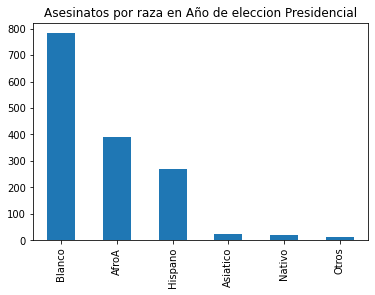

In [20]:
plot = Ases_año_elec['raza'].value_counts().plot(kind='bar',
                                            title='Asesinatos por raza en Año de eleccion Presidencial')

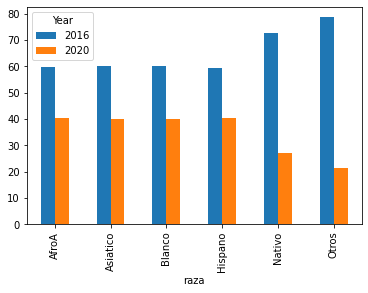

In [21]:
pd.crosstab(index=Ases_año_elec['raza'],
            columns=Ases_año_elec['Year']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [22]:
Ases_año_elec

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
994,1139,Joshua Sisson,2016-01-01,shot,knife,30.0,M,Blanco,San Diego,CA,False,other,Not fleeing,True,True,POINT (-117.16000 32.75500),2016
995,1195,Lance Light,2016-01-02,shot,gun,54.0,M,Blanco,Maryneal,TX,False,attack,Car,False,True,POINT (-100.45000 32.23500),2016
996,1198,Lonnie Haskell Powers,2016-01-02,shot,gun,37.0,M,Blanco,Sioux Falls,SD,False,attack,Not fleeing,False,True,POINT (-96.71100 43.54700),2016
997,1138,Sean O'Brien,2016-01-02,shot and Tasered,knife,37.0,M,Blanco,Livingston,MT,False,other,Not fleeing,False,True,POINT (-110.57300 45.65600),2016
998,1140,Germonta Wallace,2016-01-03,shot,gun,30.0,M,AfroA,Charlotte,NC,False,attack,Not fleeing,False,True,POINT (-80.88500 35.21800),2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,6275,Caleb Slay,2020-11-02,shot,undetermined,25.0,M,NaN,Springfield,MO,False,undetermined,NaN,False,True,POINT (-93.28000 37.18200),2020
5747,6280,John Mellone,2020-11-02,shot,vehicle,39.0,M,Blanco,Lynn,MA,False,attack,Car,False,True,POINT (-70.96300 42.46000),2020
5748,6284,NaN,2020-11-03,shot,gun,59.0,M,NaN,Beaumont,TX,False,attack,Not fleeing,False,True,POINT (-94.21100 30.17900),2020
5749,6285,NaN,2020-11-03,shot,gun,NaN,M,NaN,San Antonio,TX,False,other,Not fleeing,False,True,POINT (-98.76100 29.46300),2020


In [23]:
muertes_x_estado_raza = Ases_año_elec.pivot_table(
    columns="raza",
    index="state",
    values="id",
    aggfunc="count"
)

In [24]:
muertes_x_estado_raza=muertes_x_estado_raza.fillna(0)

In [25]:
muertes_x_estado_raza['Total'] = muertes_x_estado_raza['Asiatico'] + muertes_x_estado_raza['AfroA'] +muertes_x_estado_raza['Hispano'] +muertes_x_estado_raza['Nativo'] +muertes_x_estado_raza['Otros'] +muertes_x_estado_raza['Blanco'] 

In [26]:
#muertes_x_estado_raza

In [27]:
Estados_con_mas_muertes = muertes_x_estado_raza[(muertes_x_estado_raza['Total'] > 50)]

In [28]:
Estados_con_mas_muertes

raza,AfroA,Asiatico,Blanco,Hispano,Nativo,Otros,Total
state,,,,,,,
AZ,3.0,0.0,29.0,28.0,7.0,0.0,67.0
CA,33.0,9.0,68.0,92.0,0.0,0.0,202.0
CO,5.0,0.0,36.0,14.0,1.0,1.0,57.0
FL,35.0,1.0,57.0,14.0,0.0,2.0,109.0
GA,27.0,1.0,17.0,6.0,0.0,0.0,51.0
NC,19.0,1.0,35.0,1.0,0.0,0.0,56.0
TX,33.0,1.0,51.0,42.0,1.0,2.0,130.0


Ploteamos los puntos Geograficos de donde se dieron los asesinatos

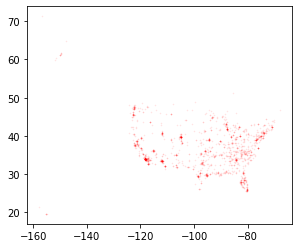

In [29]:
Ases_año_elec.plot(color="red",alpha=0.08,markersize=0.5)

In [30]:
Ases_AfroA_año_elec = df.loc[df['Year'].isin(['2016', '2020']) & df['raza'].isin(['AfroA'])]

In [31]:
muertes_x_estado_ng = Ases_AfroA_año_elec.pivot_table(
    columns="raza",
    index="state",
    values="id",
    aggfunc="count"
)

In [32]:
muertes_x_estado_ng=muertes_x_estado_ng.fillna(0)

In [33]:
muertes_x_estado_ng.head()

raza,AfroA
state,
AL,9
AR,5
AZ,3
CA,33
CO,5


In [34]:
def f(x):
    if (x['AfroA'] + x['Hispano'] > x['Blanco']):
        return 'Mayor cantidad de muertos No Blancos'
    else:
        return 'Mayor cantidad de muertos Blancos'
Estados_con_mas_muertes = Estados_con_mas_muertes.assign(indice=Estados_con_mas_muertes.apply(f, axis=1))

Text(0, 0.5, 'Total')

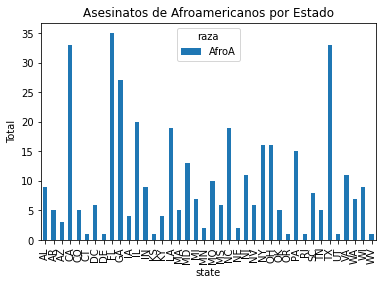

In [35]:
ax = muertes_x_estado_ng.plot(kind='bar',
       title='Asesinatos de Afroamericanos por Estado')
ax.set_xlabel('state')
ax.set_ylabel('Total')

In [36]:
Comp_Etnica = geomap[['st','asian','black','white', 'hispanic','amerindian','other','total_population','geometry']]

In [37]:
Comp_Etnica['Pobl_Asiatico'] = (Comp_Etnica['total_population']*Comp_Etnica['asian']/100)
Comp_Etnica['Pobl_AfroA'] = (Comp_Etnica['total_population']*Comp_Etnica['black']/100)
Comp_Etnica['Pobl_Blanco'] = (Comp_Etnica['total_population']*Comp_Etnica['white']/100)
Comp_Etnica['Pobl_Hispano'] = (Comp_Etnica['total_population']*Comp_Etnica['hispanic']/100)
Comp_Etnica['Pobl_Nativo'] = (Comp_Etnica['total_population']*Comp_Etnica['amerindian']/100)
Comp_Etnica['Pobl_Otros'] = (Comp_Etnica['total_population']*Comp_Etnica['other']/100)

Comp_Etnicast= Comp_Etnica.drop(columns=['asian','black','white', 'hispanic','amerindian','other','geometry'])

In [38]:
cols = ['Pobl_Asiatico','Pobl_AfroA','Pobl_Blanco','Pobl_Hispano','Pobl_Nativo','Pobl_Otros']
Comp_Etnicast[cols]  = Comp_Etnicast[cols].round()

In [39]:
Comp_Etnicast  = Comp_Etnicast.groupby('st').sum()

In [40]:
Muertes_x_mill = pd.concat([Comp_Etnicast,muertes_x_estado_raza], axis=1, sort=False)

In [41]:
Muertes_x_mill

,total_population,Pobl_Asiatico,Pobl_AfroA,Pobl_Blanco,Pobl_Hispano,Pobl_Nativo,Pobl_Otros,AfroA,Asiatico,Blanco,Hispano,Nativo,Otros,Total
AK,696679,34427.0,23109.0,451840.0,39559.0,96358.0,51503.0,0.0,1.0,8.0,0.0,3.0,0.0,12.0
AL,4706534,49648.0,1224569.0,3190103.0,157752.0,23512.0,61050.0,9.0,0.0,25.0,0.0,0.0,0.0,34.0
AR,2877011,33204.0,442206.0,2161840.0,169715.0,19076.0,51056.0,5.0,0.0,17.0,0.0,0.0,0.0,22.0
AZ,6358438,160857.0,227614.0,3697838.0,1889756.0,259579.0,127302.0,3.0,0.0,29.0,28.0,7.0,0.0,67.0
CA,36781229,4592607.0,2171851.0,15208527.0,13553302.0,163922.0,1098689.0,33.0,9.0,68.0,92.0,0.0,0.0,202.0
CO,4936185,129316.0,183366.0,3486598.0,996802.0,30983.0,110158.0,5.0,0.0,36.0,14.0,1.0,1.0,57.0
CT,3534290,125553.0,326178.0,2565867.0,442339.0,5854.0,68625.0,1.0,0.0,4.0,3.0,0.0,0.0,8.0
DC,595078,19042.0,311226.0,198459.0,52367.0,1190.0,12497.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0
DE,880882,26542.0,180130.0,588778.0,65426.0,2693.0,17219.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
FL,18511850,425988.0,2779158.0,10959446.0,3981539.0,45934.0,320469.0,35.0,1.0,57.0,14.0,0.0,2.0,109.0


In [42]:
Muertes_x_mill['Muertes_as_cienmil'] = Muertes_x_mill['Asiatico'] / (Muertes_x_mill['Pobl_Asiatico']/100000)
Muertes_x_mill['Muertes_aa_cienmil'] =  Muertes_x_mill['AfroA'] / (Muertes_x_mill['Pobl_AfroA']/100000)
Muertes_x_mill['Muertes_bl_cienmil'] = Muertes_x_mill['Blanco'] / (Muertes_x_mill['Pobl_Blanco']/100000)
Muertes_x_mill['Muertes_hi_cienmil'] = Muertes_x_mill['Hispano'] /  (Muertes_x_mill['Pobl_Hispano']/100000)
Muertes_x_mill['Muertes_nt_cienmil'] = Muertes_x_mill['Nativo'] / (Muertes_x_mill['Pobl_Nativo']/100000)
Muertes_x_mill['Muertes_ot_cienmil'] = Muertes_x_mill['Otros'] / (Muertes_x_mill['Pobl_Otros']/100000)
Muertes_x_mill['Muertes_totales_cienmil'] = Muertes_x_mill['Total'] / (Muertes_x_mill['total_population']/100000)

**ESTADOS CON MAS MUERTOS
 CADA 100 MIL HABITANTES**

In [43]:
Estados_con_mas_muertes = Muertes_x_mill[(Muertes_x_mill['Muertes_totales_cienmil'] > 1)]

In [44]:
Estados_con_mas_muertes

,total_population,Pobl_Asiatico,Pobl_AfroA,Pobl_Blanco,Pobl_Hispano,Pobl_Nativo,Pobl_Otros,AfroA,Asiatico,Blanco,Hispano,Nativo,Otros,Total,Muertes_as_cienmil,Muertes_aa_cienmil,Muertes_bl_cienmil,Muertes_hi_cienmil,Muertes_nt_cienmil,Muertes_ot_cienmil,Muertes_totales_cienmil
AK,696679,34427.0,23109.0,451840.0,39559.0,96358.0,51503.0,0.0,1.0,8.0,0.0,3.0,0.0,12.0,2.904697,0.000000,1.770538,0.000000,3.113390,0.000000,1.722458
AZ,6358438,160857.0,227614.0,3697838.0,1889756.0,259579.0,127302.0,3.0,0.0,29.0,28.0,7.0,0.0,67.0,0.000000,1.318021,0.784242,1.481673,2.696674,0.000000,1.053718
CO,4936185,129316.0,183366.0,3486598.0,996802.0,30983.0,110158.0,5.0,0.0,36.0,14.0,1.0,1.0,57.0,0.000000,2.726787,1.032525,1.404492,3.227576,0.907787,1.154738
DC,595078,19042.0,311226.0,198459.0,52367.0,1190.0,12497.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.000000,1.927859,0.000000,0.000000,0.000000,0.000000,1.008271
NM,2012010,25794.0,37735.0,825919.0,915971.0,173729.0,33303.0,0.0,0.0,7.0,21.0,1.0,0.0,29.0,0.000000,0.000000,0.847541,2.292649,0.575609,0.000000,1.441345
NV,2623155,173556.0,195994.0,1464092.0,677977.0,24785.0,87924.0,6.0,0.0,15.0,10.0,0.0,0.0,31.0,0.000000,3.061318,1.024526,1.474976,0.000000,0.000000,1.181783
OK,3680693,59973.0,266667.0,2579978.0,301335.0,268187.0,203807.0,5.0,0.0,30.0,4.0,0.0,0.0,39.0,0.000000,1.874998,1.162801,1.327426,0.000000,0.000000,1.059583


**ESTADOS CON MAS MUERTOS AFROAMERICANOS CADA 100 MIL HABITANTES**

In [45]:
Estados_con_mas_muertes_AfroA = Muertes_x_mill[(Muertes_x_mill['Muertes_aa_cienmil'] > 1)]

In [46]:
Estados_con_mas_muertes_AfroA

,total_population,Pobl_Asiatico,Pobl_AfroA,Pobl_Blanco,Pobl_Hispano,Pobl_Nativo,Pobl_Otros,AfroA,Asiatico,Blanco,Hispano,Nativo,Otros,Total,Muertes_as_cienmil,Muertes_aa_cienmil,Muertes_bl_cienmil,Muertes_hi_cienmil,Muertes_nt_cienmil,Muertes_ot_cienmil,Muertes_totales_cienmil
AR,2877011,33204.0,442206.0,2161840.0,169715.0,19076.0,51056.0,5.0,0.0,17.0,0.0,0.0,0.0,22.0,0.000000,1.130695,0.786367,0.000000,0.000000,0.000000,0.764683
AZ,6358438,160857.0,227614.0,3697838.0,1889756.0,259579.0,127302.0,3.0,0.0,29.0,28.0,7.0,0.0,67.0,0.000000,1.318021,0.784242,1.481673,2.696674,0.000000,1.053718
CA,36781229,4592607.0,2171851.0,15208527.0,13553302.0,163922.0,1098689.0,33.0,9.0,68.0,92.0,0.0,0.0,202.0,0.195967,1.519441,0.447118,0.678801,0.000000,0.000000,0.549193
CO,4936185,129316.0,183366.0,3486598.0,996802.0,30983.0,110158.0,5.0,0.0,36.0,14.0,1.0,1.0,57.0,0.000000,2.726787,1.032525,1.404492,3.227576,0.907787,1.154738
DC,595078,19042.0,311226.0,198459.0,52367.0,1190.0,12497.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.000000,1.927859,0.000000,0.000000,0.000000,0.000000,1.008271
FL,18511850,425988.0,2779158.0,10959446.0,3981539.0,45934.0,320469.0,35.0,1.0,57.0,14.0,0.0,2.0,109.0,0.234748,1.259374,0.520099,0.351623,0.000000,0.624085,0.588812
IA,3012594,49428.0,78971.0,2697452.0,136497.0,8075.0,42320.0,4.0,0.0,6.0,0.0,0.0,0.0,10.0,0.000000,5.065150,0.222432,0.000000,0.000000,0.000000,0.331940
IL,12807809,555512.0,1845313.0,8250140.0,1951770.0,16140.0,188231.0,20.0,0.0,10.0,4.0,0.0,0.0,34.0,0.000000,1.083827,0.121210,0.204942,0.000000,0.000000,0.265463
IN,6413109,92776.0,562446.0,5283508.0,355027.0,13012.0,106708.0,9.0,0.0,15.0,2.0,0.0,0.0,26.0,0.000000,1.600154,0.283902,0.563337,0.000000,0.000000,0.405420
KY,4295654,45537.0,324454.0,3736611.0,116717.0,7810.0,63930.0,4.0,0.0,26.0,1.0,0.0,0.0,31.0,0.000000,1.232840,0.695818,0.856773,0.000000,0.000000,0.721660


In [47]:
usmap = geopandas.read_file('/content/drive/MyDrive/Programa Big Data /Trabajo Final/tl_2016_us_state.geojson')

In [48]:
usmap = usmap[usmap.NAME !='Commonwealth of the Northern Mariana Islands']	
usmap = usmap[usmap.NAME !='American Samoa']
usmap = usmap[usmap.NAME !='Alaska']
usmap = usmap[usmap.NAME !='Guam']

In [49]:
usmap.rename(columns= {'STUSPS':'st'}, inplace=True)

In [50]:
usmap = usmap[['st','NAME','geometry']]

In [51]:
usmap.set_index('st',inplace=True)

In [52]:
usmap

,NAME,geometry
st,,
WV,West Virginia,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
FL,Florida,"MULTIPOLYGON (((-82.98624 24.61065, -82.98748 ..."
IL,Illinois,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
MN,Minnesota,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
MD,Maryland,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
RI,Rhode Island,"MULTIPOLYGON (((-71.67264 41.13429, -71.67609 ..."
ID,Idaho,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
NH,New Hampshire,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
NC,North Carolina,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."


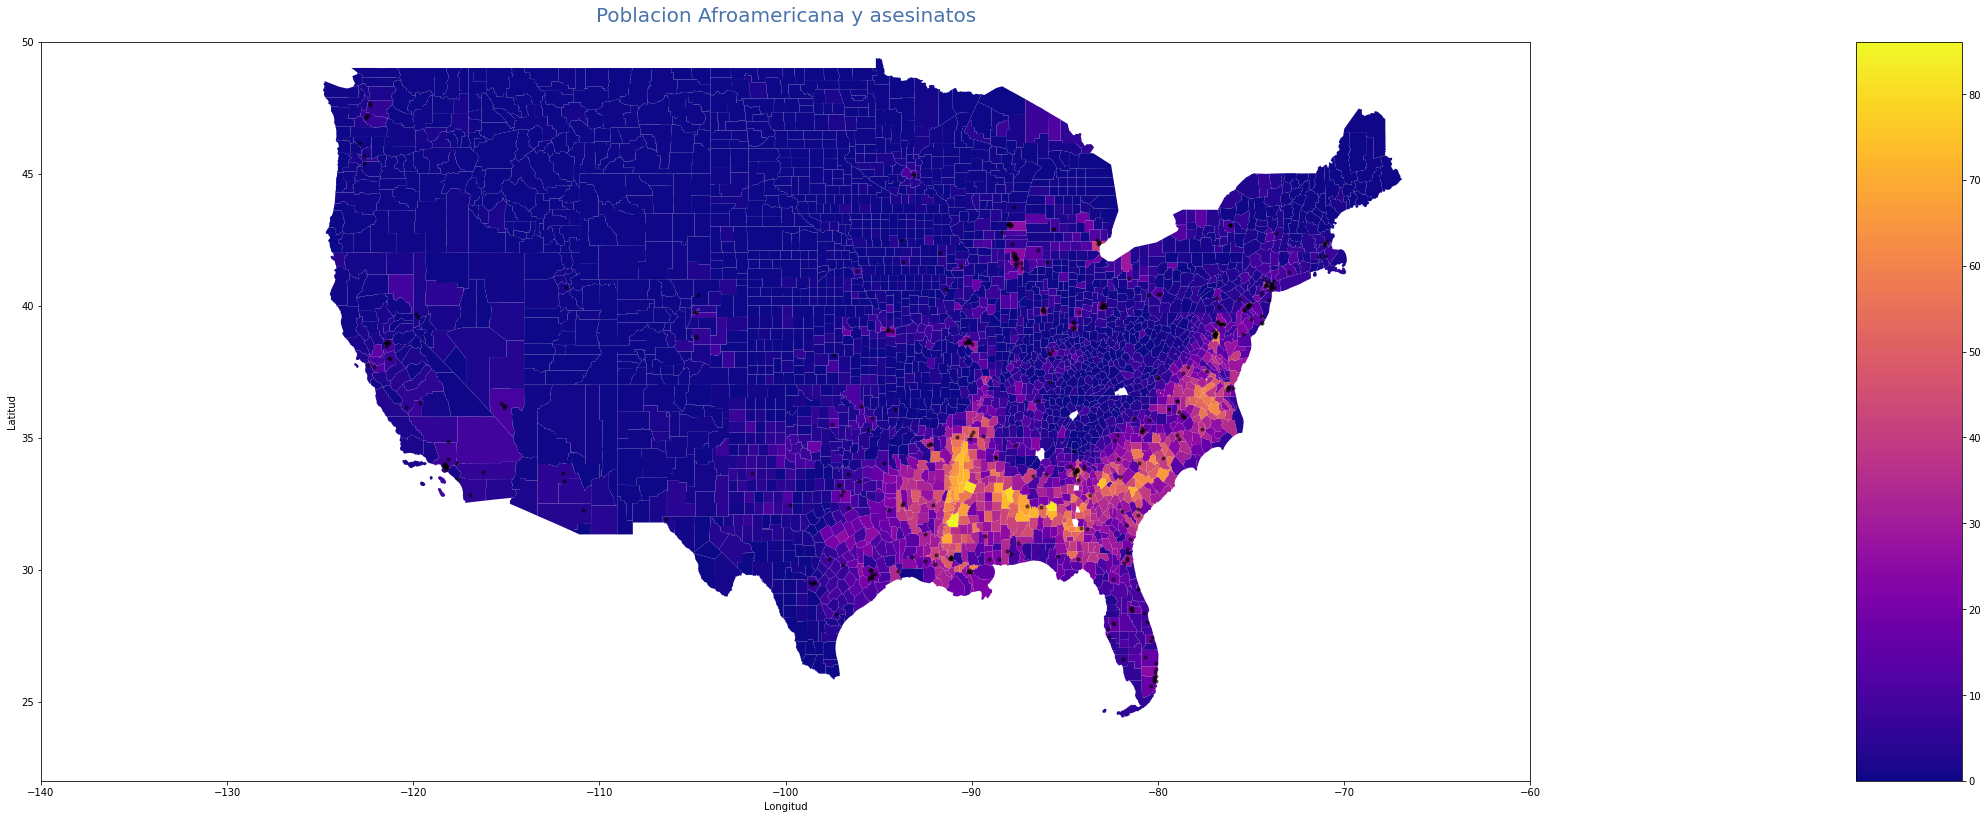

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-140, -60, 22, 50])
ax.set_title('Poblacion Afroamericana y asesinatos', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Ases_AfroA_año_elec.plot(ax=ax,color="black",alpha=0.5,markersize=10,zorder=2)
geomap.plot(column='african_american_population', cmap='plasma',ax=ax,
              legend=True, cax=cax)

plt.show();

In [54]:
eleccion2020 = pd.read_csv("/content/drive/MyDrive/Programa Big Data /Trabajo Final/president_county_candidate.csv")

In [55]:
eleccion2020.rename(columns= {'state':'st'}, inplace=True)

In [56]:
eleccion2020.replace({'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
},inplace=True)

In [57]:
eleccion20 = eleccion2020.pivot_table(
    columns="party",
    index="st",
    values="total_votes",
    aggfunc="sum"
)

In [58]:
eleccion20 = eleccion20.loc[:, ['DEM','REP','LIB']] 

In [59]:
eleccion20['%trump_2020']=  eleccion20['REP']*100 / (eleccion20['DEM'] + eleccion20['REP'] + eleccion20['LIB'])

In [60]:
eleccion20

party,DEM,REP,LIB,%trump_2020
st,,,,
AK,153551.0,189457.0,8867.0,53.842131
AL,843473.0,1434159.0,24994.0,62.283627
AR,423503.0,759715.0,13128.0,63.502950
AZ,1672143.0,1661686.0,51465.0,49.085427
CA,11016457.0,5931349.0,185409.0,34.619008
CO,1803941.0,1364226.0,52428.0,42.359440
CT,1080575.0,715651.0,20425.0,39.393973
DC,307265.0,18172.0,1977.0,5.550160
DE,296268.0,200603.0,5000.0,39.971028


In [61]:
resultados=geomap[['st','votes16_trumpd','votes16_johnsong','votes16_clintonh','total_population','fips','geometry']]

In [62]:
resultados

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry
0,GA,47531.0,9209.0,239131.0,712476,13089,"POLYGON ((-84.34848 33.82540, -84.34752 33.967..."
1,TX,3166.0,115.0,807.0,13630,48487,"POLYGON ((-99.47529 34.08562, -99.47511 34.395..."
2,VA,3206.0,88.0,2226.0,12911,51111,"POLYGON ((-78.39738 37.08605, -78.39670 37.087..."
3,GA,31093.0,1053.0,8279.0,83005,13297,"POLYGON ((-83.91562 33.74470, -83.98220 33.786..."
4,NC,6226.0,164.0,1670.0,17850,37011,"POLYGON ((-82.01644 36.14508, -81.96010 36.228..."
...,...,...,...,...,...,...,...
3138,TN,9525.0,193.0,2425.0,31708,47131,"POLYGON ((-89.25634 36.50632, -88.95975 36.502..."
3139,MI,224589.0,12860.0,176238.0,834723,26099,"POLYGON ((-82.72928 42.70606, -82.71966 42.703..."
3140,WV,3516.0,157.0,1315.0,14538,54007,"POLYGON ((-80.93340 38.74669, -80.85072 38.792..."
3141,NC,6225.0,138.0,1585.0,15634,37121,"POLYGON ((-82.24515 36.13101, -82.24155 36.137..."


In [63]:
def n(x):
    if (x['votes16_johnsong'] <= x['votes16_clintonh'] < x['votes16_trumpd']):
        return 'Trump'
    elif (x['votes16_johnsong'] <= x['votes16_trumpd'] < x['votes16_clintonh']):
        return 'Clinton'
    elif (x['votes16_trumpd'] <= x['votes16_clintonh'] < x['votes16_johnsong']):
        return 'Jhonson'
    else:
        return ''
resultados = resultados.assign(ganador=resultados.apply(n, axis=1))

In [64]:
resultados

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry,ganador
0,GA,47531.0,9209.0,239131.0,712476,13089,"POLYGON ((-84.34848 33.82540, -84.34752 33.967...",Clinton
1,TX,3166.0,115.0,807.0,13630,48487,"POLYGON ((-99.47529 34.08562, -99.47511 34.395...",Trump
2,VA,3206.0,88.0,2226.0,12911,51111,"POLYGON ((-78.39738 37.08605, -78.39670 37.087...",Trump
3,GA,31093.0,1053.0,8279.0,83005,13297,"POLYGON ((-83.91562 33.74470, -83.98220 33.786...",Trump
4,NC,6226.0,164.0,1670.0,17850,37011,"POLYGON ((-82.01644 36.14508, -81.96010 36.228...",Trump
...,...,...,...,...,...,...,...,...
3138,TN,9525.0,193.0,2425.0,31708,47131,"POLYGON ((-89.25634 36.50632, -88.95975 36.502...",Trump
3139,MI,224589.0,12860.0,176238.0,834723,26099,"POLYGON ((-82.72928 42.70606, -82.71966 42.703...",Trump
3140,WV,3516.0,157.0,1315.0,14538,54007,"POLYGON ((-80.93340 38.74669, -80.85072 38.792...",Trump
3141,NC,6225.0,138.0,1585.0,15634,37121,"POLYGON ((-82.24515 36.13101, -82.24155 36.137...",Trump


In [65]:
res_x_st=resultados.groupby('st').sum()

In [66]:
res_x_st['%_trump_2016']=res_x_st['votes16_trumpd']*100 / (res_x_st['votes16_trumpd'] + res_x_st['votes16_johnsong'] + res_x_st['votes16_clintonh']) 

In [67]:
res_x_st

,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,%_trump_2016
st,,,,,
AK,0.0,0.0,0.0,696679,NaN
AL,1306925.0,43869.0,718084.0,4706534,63.170714
AR,677904.0,29518.0,378729.0,2877011,62.413421
AZ,1021154.0,80151.0,936250.0,6358438,50.116635
CA,3916209.0,402406.0,7362490.0,36781229,33.526015
CO,1137455.0,129451.0,1212209.0,4936185,45.881494
CT,668266.0,48051.0,884432.0,3534290,41.747082
DC,11553.0,4501.0,260223.0,595078,4.181673
DE,185103.0,14751.0,235581.0,880882,42.509904


In [68]:
comparacion = pd.concat([eleccion20,res_x_st,usmap], axis=1, sort=False)

concatenar los afroamericanos muertos por estado *100.000, mapearlo tambien, y scaterplt entre eje x (muertos por 100mil) y eje y (diferencia de votos 16/20) puntos (los estados)


In [69]:
comparacion['Dif']=comparacion['%trump_2020'] - comparacion['%_trump_2016'] 

In [70]:
comparaciongdf = geopandas.GeoDataFrame(comparacion)

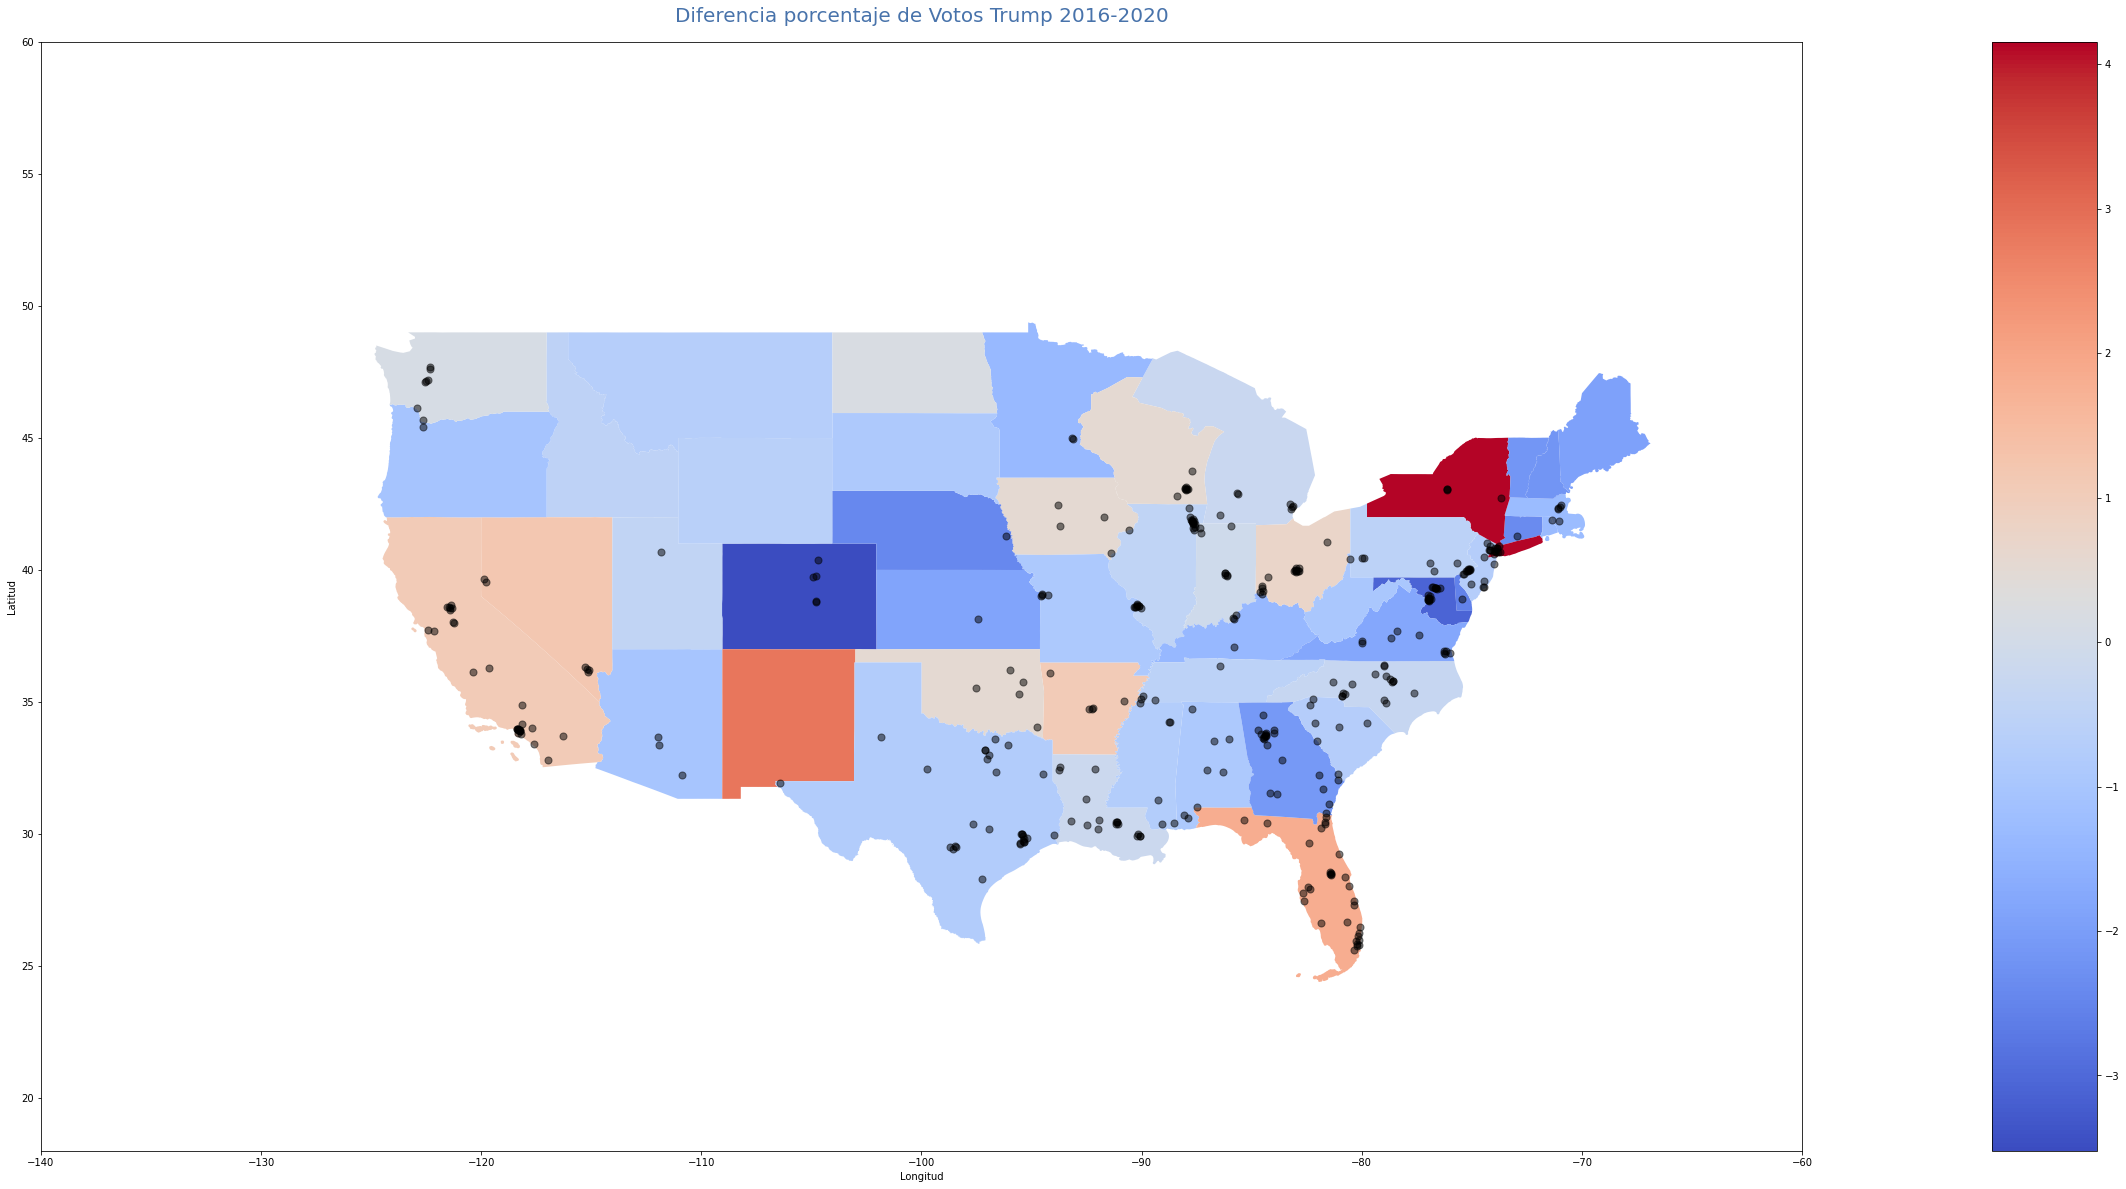

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-140, -60, 18, 60])
ax.set_title('Diferencia porcentaje de Votos Trump 2016-2020', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Ases_AfroA_año_elec.plot(ax=ax,color="black",alpha=0.5,markersize=50,zorder=2)
comparaciongdf.plot(column='Dif', cmap='coolwarm',ax=ax,
              legend=True, cax=cax)

plt.show();

In [72]:
afroam_elec16y20 = pd.concat([comparacion['Dif'],Muertes_x_mill['Muertes_aa_cienmil'],usmap], axis=1, sort=False)

In [73]:
import plotly.express as px
fig = px.scatter(afroam_elec16y20, x='Dif', y='Muertes_aa_cienmil',hover_data=['NAME'])
fig.show()

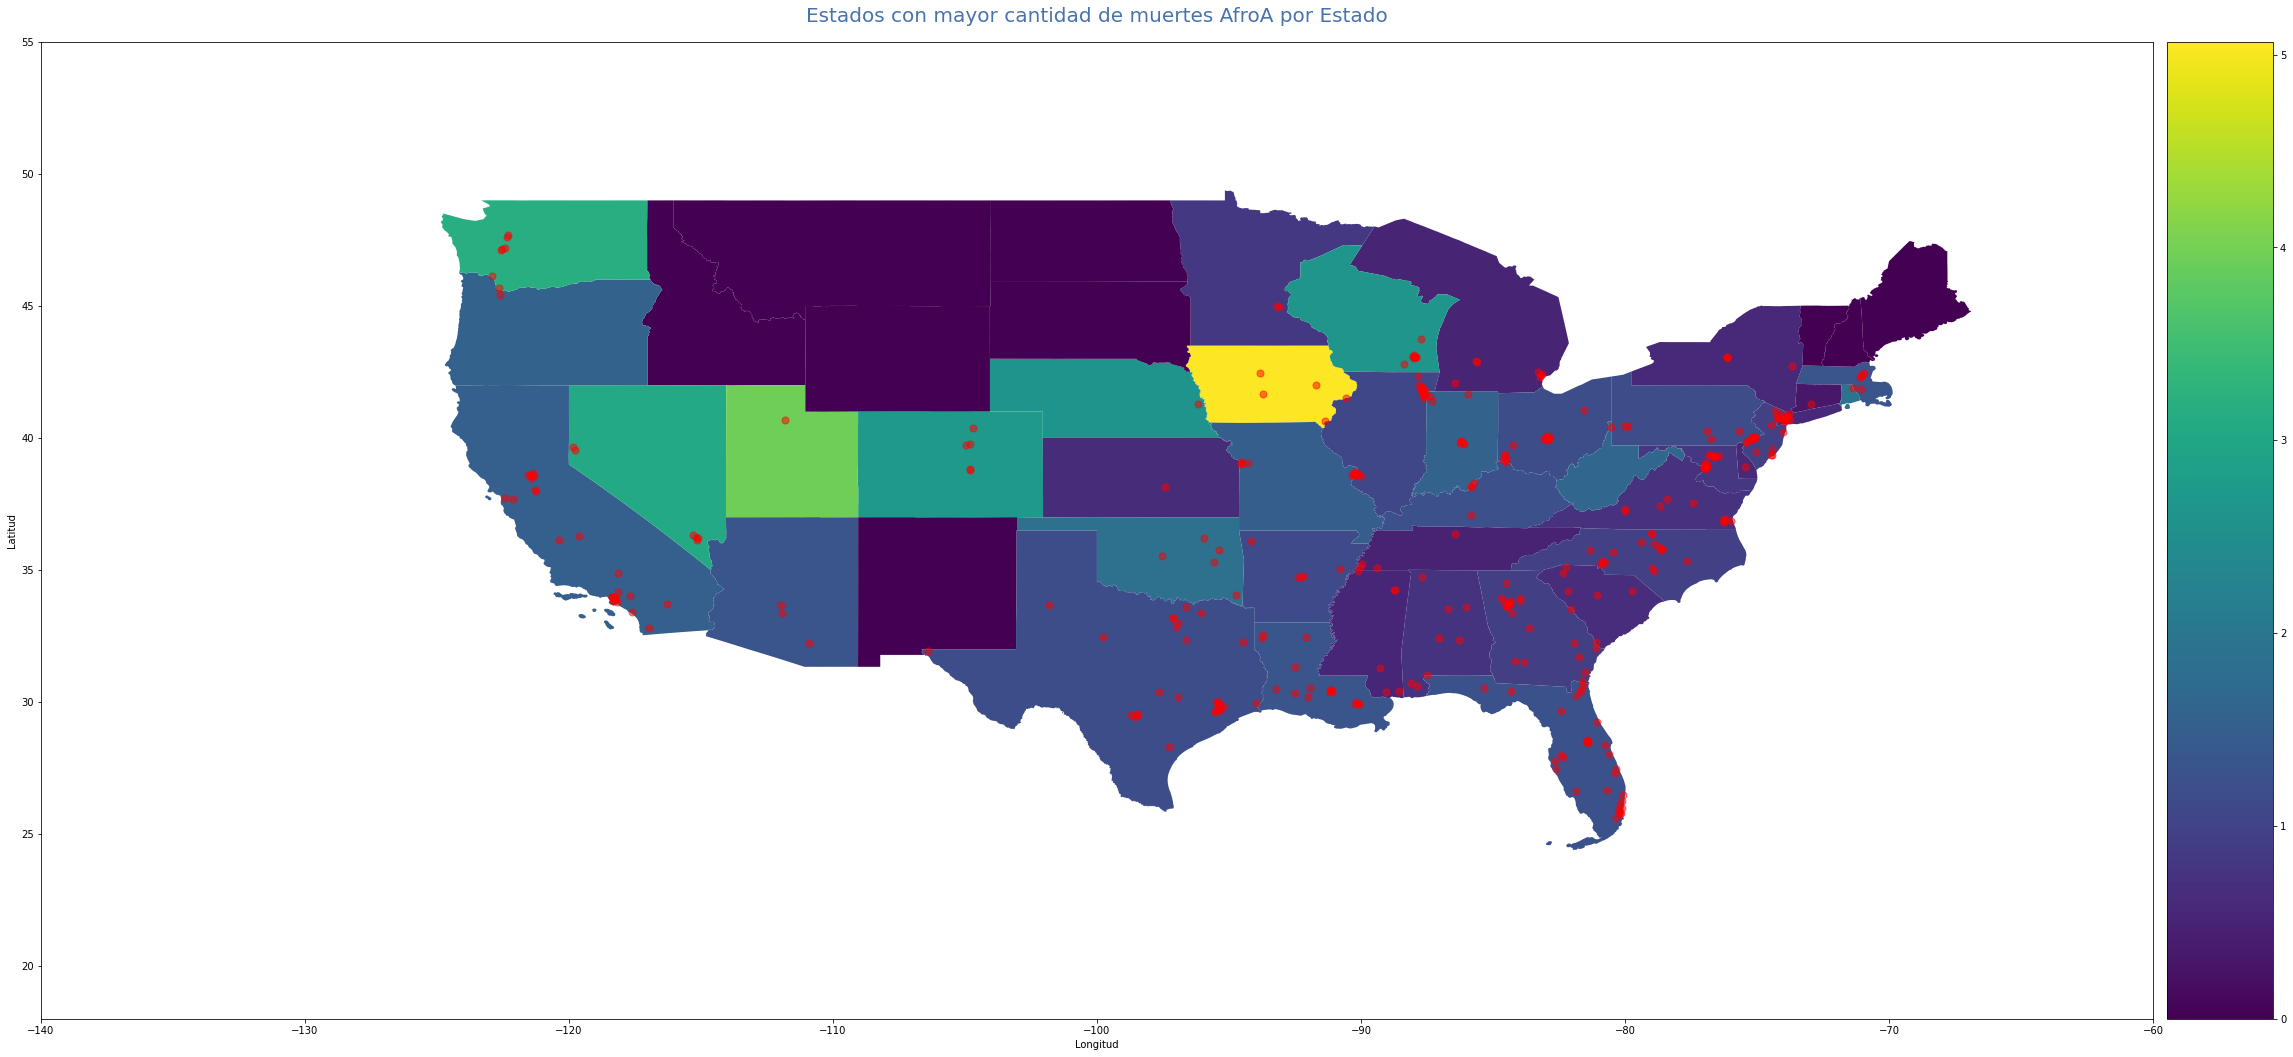

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
ax.axis([-140, -60, 18, 55])
ax.set_title('Estados con mayor cantidad de muertes AfroA por Estado', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Ases_AfroA_año_elec.plot(ax=ax,color="red",alpha=0.5,markersize=50,zorder=2)
afroam_elec16y20.plot(column='Muertes_aa_cienmil', cmap='viridis',ax=ax,
              legend=True, cax=cax)

plt.show();

Seleccionamos los Estados de Georgia, Wisconsin, Michigan y Pensilvania y analizamos los resultados electorales del año 2016 y la cantidad de muertes tanto en el 2016 como en el 2020




In [75]:
Georgia2016 = resultados.loc[resultados['st'] == ('GA')] 


In [76]:
Georgia2016.head()

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry,ganador
0,GA,47531.0,9209.0,239131.0,712476,13089,"POLYGON ((-84.34848 33.82540, -84.34752 33.967...",Clinton
3,GA,31093.0,1053.0,8279.0,83005,13297,"POLYGON ((-83.91562 33.74470, -83.98220 33.786...",Trump
94,GA,5408.0,114.0,1041.0,18050,13019,"POLYGON ((-83.34477 31.25109, -83.34757 31.252...",Trump
100,GA,9849.0,228.0,1962.0,21027,13291,"POLYGON ((-84.11186 34.87503, -84.11054 34.877...",Trump
167,GA,6559.0,218.0,2658.0,17994,13211,"POLYGON ((-83.59019 33.71141, -83.53694 33.778...",Trump


In [77]:
Georgia2016 = Georgia2016.groupby(by="st").sum()

In [78]:
Georgia2016['porc trump']=  Georgia2016['votes16_trumpd']*100 / (Georgia2016['votes16_trumpd'] + Georgia2016['votes16_johnsong'] + Georgia2016['votes16_clintonh']) 

In [79]:
Georgia2016


,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,porc trump
st,,,,,
GA,2068623.0,123641.0,1837300.0,9592621,51.33615


In [80]:
Georgia2016_2020 = comparacion.loc[comparacion['NAME'] == ('Georgia')] 

In [81]:
Georgia2016_2020

,DEM,REP,LIB,%trump_2020,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,%_trump_2016,NAME,geometry,Dif
GA,2474507.0,2461837.0,62138.0,49.251693,2068623.0,123641.0,1837300.0,9592621.0,51.33615,Georgia,"POLYGON ((-85.38658 33.90172, -85.38659 33.901...",-2.084457


In [82]:
Georgiasoc = geomap.loc[geomap['st'].isin(['GA'])]
Georgia_muertes = Ases_AfroA_año_elec.loc[Ases_AfroA_año_elec['state'].isin(['GA'])]

In [83]:
Georgia_muertes

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
1295,1479,Demetrius Dorsey,2016-04-18,shot,gun,18.0,M,AfroA,Mableton,GA,False,attack,Not fleeing,False,True,POINT (-84.56400 33.79800),2016
1359,1542,Jabril Robinson,2016-05-16,shot,gun,23.0,M,AfroA,Riverdale,GA,False,attack,Foot,False,True,POINT (-84.44900 33.58000),2016
1401,1586,Michael Johnson,2016-06-01,shot,gun,21.0,M,AfroA,Newnan,GA,False,attack,Foot,True,True,POINT (nan nan),2016
1460,1647,Deravis Caine Rogers,2016-06-22,shot,unarmed,22.0,M,AfroA,Atlanta,GA,False,undetermined,Other,False,True,POINT (-84.37000 33.81100),2016
1577,1767,Jamarion Rashad Robinson,2016-08-05,shot,gun,26.0,M,AfroA,East Point,GA,True,attack,Not fleeing,False,True,POINT (-84.49100 33.64400),2016
1667,1867,Robert Lee Brown,2016-09-07,shot,knife,55.0,M,AfroA,Albany,GA,False,attack,Not fleeing,False,True,POINT (-84.16200 31.56900),2016
1735,1944,Larry Daniel Matthews,2016-10-07,shot,pepper spray,57.0,M,AfroA,Macon,GA,False,other,Not fleeing,False,True,POINT (-83.64400 32.81200),2016
1831,2037,Andrew Depeiza,2016-11-11,shot and Tasered,unarmed,NaN,M,AfroA,East Point,GA,False,attack,Foot,False,True,POINT (-84.43900 33.68000),2016
1842,2057,Dontrell Montrese Carter,2016-11-18,shot,gun,25.0,M,AfroA,Ludowici,GA,False,attack,Not fleeing,False,True,POINT (-81.74200 31.70800),2016
1910,2128,Earl Labon Eubanks,2016-12-13,shot and Tasered,gun,32.0,M,AfroA,Hampton,GA,True,other,Not fleeing,False,True,POINT (-84.28300 33.38600),2016


Cantidad de muertes en Georgia durante años electorales

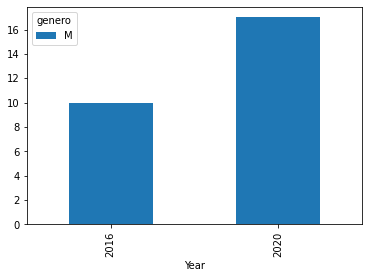

In [84]:
pd.crosstab(index=Georgia_muertes['Year'],
            columns=Georgia_muertes['genero']).plot(kind='bar')

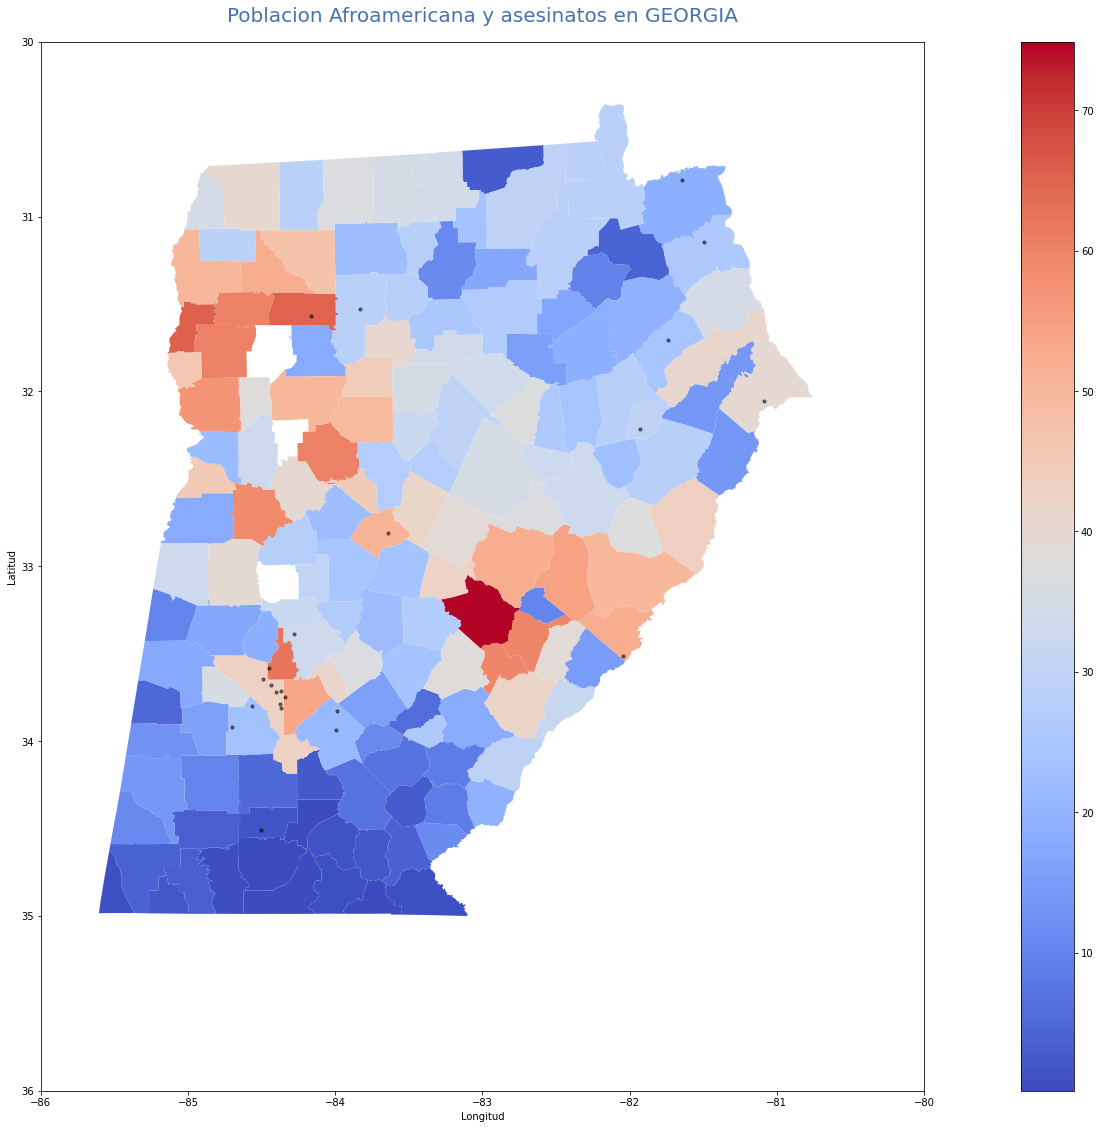

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.axis([-86, -80, 36, 30])
ax.set_title('Poblacion Afroamericana y asesinatos en GEORGIA', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Georgia_muertes.plot(ax=ax,color="black",alpha=0.5,markersize=10,zorder=2)
Georgiasoc.plot(column='african_american_population', cmap='coolwarm',ax=ax,
              legend=True, cax=cax)

plt.show();

WISCONSIN

In [86]:
Wisconsin2016 = resultados.loc[resultados['st'] == ('WI')] 

In [87]:
Wisconsin2016.head()

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry,ganador
26,WI,17310.0,1490.0,18524.0,69226,55097,"POLYGON ((-89.84504 44.60738, -89.84493 44.684...",Clinton
33,WI,31044.0,1910.0,17391.0,100484,55039,"POLYGON ((-88.88518 43.72083, -88.88570 43.895...",Trump
38,WI,17912.0,1207.0,11875.0,61143,55017,"POLYGON ((-91.65151 45.11328, -91.65158 45.120...",Trump
61,WI,8693.0,687.0,9121.0,36236,55045,"POLYGON ((-89.83857 42.77049, -89.83817 42.857...",Clinton
128,WI,7669.0,314.0,3802.0,24578,55137,"POLYGON ((-89.59770 44.15607, -89.59716 44.195...",Trump


In [88]:
Wisconsin2016 = Wisconsin2016.groupby(by="st").sum()

In [89]:
Wisconsin2016['porc trump']=  Wisconsin2016['votes16_trumpd']*100 / (Wisconsin2016['votes16_trumpd'] + Wisconsin2016['votes16_johnsong'] + Wisconsin2016['votes16_clintonh'])

In [90]:
Wisconsin2016

,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,porc trump
st,,,,,
WI,1403694.0,106367.0,1380823.0,5643185,48.555874


In [91]:
Wisconsin2016_2020 = comparacion.loc[comparacion['NAME'] == ('WI')] 

In [92]:
Wisconsin2016_2020

,DEM,REP,LIB,%trump_2020,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,%_trump_2016,NAME,geometry,Dif


In [93]:
Wisconsinsoc = geomap.loc[geomap['st'].isin(['WI'])]
Wisconsin_muertes = Ases_AfroA_año_elec.loc[Ases_AfroA_año_elec['state'].isin(['WI'])]

In [94]:
Wisconsin_muertes

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
1150,1318,Christopher J. Davis,2016-02-24,shot,unarmed,21.0,M,AfroA,East Troy,WI,False,other,Car,False,True,POINT (-88.38500 42.79600),2016
1335,1517,Burt Johnson,2016-05-05,shot,gun,38.0,M,AfroA,Milwaukee,WI,False,attack,Foot,True,True,POINT (-88.00600 43.13400),2016
1462,1648,Jay Anderson,2016-06-23,shot,gun,25.0,M,AfroA,Wauwatosa,WI,False,other,Not fleeing,True,True,POINT (-88.03800 43.10100),2016
1538,1726,Austin Jerry Lee Howard,2016-07-23,shot,knife,49.0,M,AfroA,Milwaukee,WI,False,attack,Not fleeing,True,True,POINT (-87.91700 43.06400),2016
1595,1780,Sylville Smith,2016-08-13,shot,gun,23.0,M,AfroA,Milwaukee,WI,False,other,Foot,True,True,POINT (-87.96700 43.07500),2016
5021,5495,Alvin Cole,2020-02-02,shot,gun,17.0,M,AfroA,Wauwatosa,WI,False,attack,Foot,False,True,POINT (-88.04500 43.06400),2020
5093,5580,Anthony Taylor,2020-02-29,shot,gun,49.0,M,AfroA,Milwaukee,WI,False,other,NaN,False,True,POINT (-87.91400 43.05500),2020
5457,5959,Kevan Ruffin,2020-07-02,shot and Tasered,knife,32.0,M,AfroA,Sheboygan,WI,True,other,Not fleeing,True,True,POINT (-87.72500 43.74400),2020
5464,5970,Joseph W. Denton,2020-07-06,shot,gun,35.0,M,AfroA,Milwaukee,WI,False,other,NaN,False,True,POINT (-87.97600 43.02100),2020


Cantidad de muertes en Wisconsin durante años electorales

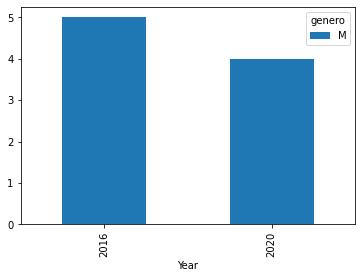

In [95]:
pd.crosstab(index=Wisconsin_muertes['Year'],
            columns=Wisconsin_muertes['genero']).plot(kind='bar')

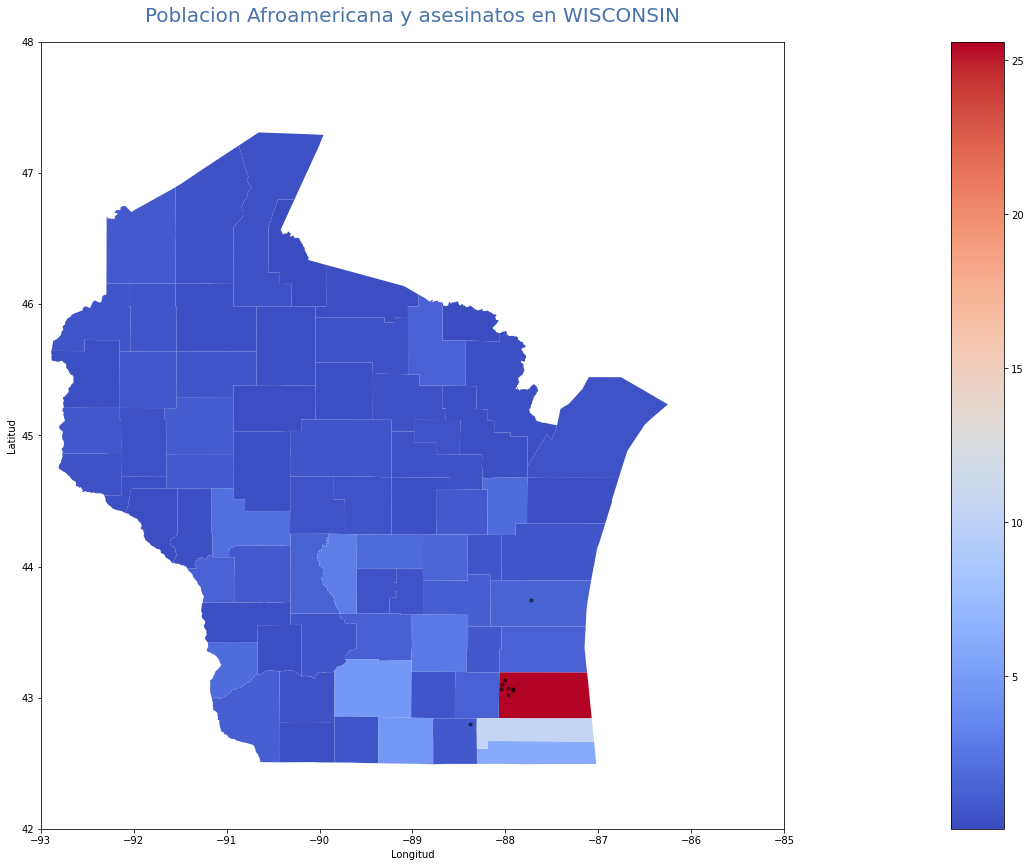

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.axis([-93, -85, 42, 48])
ax.set_title('Poblacion Afroamericana y asesinatos en WISCONSIN', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Wisconsin_muertes.plot(ax=ax,color="black",alpha=0.5,markersize=10,zorder=2)
Wisconsinsoc.plot(column='african_american_population', cmap='coolwarm',ax=ax,
              legend=True, cax=cax)

plt.show();

MICHIGAN


In [97]:
Michigan2016 = resultados.loc[resultados['st'] == ('MI')] 

In [98]:
Michigan2016.head()

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry,ganador
6,MI,21635.0,1885.0,16490.0,72458,26037,"POLYGON ((-84.83762 43.03264, -84.83689 43.118...",Trump
12,MI,2158.0,106.0,1156.0,8755,26013,"POLYGON ((-88.45120 46.93898, -88.24998 46.991...",Trump
49,MI,43255.0,2985.0,26859.0,152460,26115,"POLYGON ((-83.77026 41.92256, -83.77392 42.082...",Trump
66,MI,14094.0,700.0,4799.0,46494,26059,"POLYGON ((-84.82609 41.98567, -84.82649 42.072...",Trump
85,MI,289127.0,23143.0,342976.0,1202825,26125,"POLYGON ((-83.67727 42.60626, -83.68312 42.695...",Clinton


In [99]:
Michigan2016['porc trump']=  Michigan2016['votes16_trumpd']*100 / (Michigan2016['votes16_trumpd'] + Michigan2016['votes16_johnsong'] + Michigan2016['votes16_clintonh'])

In [100]:
Michigan2016

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry,ganador,porc trump
6,MI,21635.0,1885.0,16490.0,72458,26037,"POLYGON ((-84.83762 43.03264, -84.83689 43.118...",Trump,54.073982
12,MI,2158.0,106.0,1156.0,8755,26013,"POLYGON ((-88.45120 46.93898, -88.24998 46.991...",Trump,63.099415
49,MI,43255.0,2985.0,26859.0,152460,26115,"POLYGON ((-83.77026 41.92256, -83.77392 42.082...",Trump,59.173176
66,MI,14094.0,700.0,4799.0,46494,26059,"POLYGON ((-84.82609 41.98567, -84.82649 42.072...",Trump,71.933854
85,MI,289127.0,23143.0,342976.0,1202825,26125,"POLYGON ((-83.67727 42.60626, -83.68312 42.695...",Clinton,44.124955
...,...,...,...,...,...,...,...,...,...
3033,MI,8674.0,532.0,5137.0,26023,26029,"POLYGON ((-85.40467 45.20749, -85.45918 45.206...",Trump,60.475493
3054,MI,9878.0,687.0,5665.0,42353,26057,"POLYGON ((-84.83530 43.29220, -84.84557 43.292...",Trump,60.862600
3055,MI,12338.0,1093.0,11404.0,68481,26073,"POLYGON ((-84.75486 43.81480, -84.60604 43.815...",Trump,49.679887
3125,MI,7228.0,492.0,3973.0,27189,26127,"POLYGON ((-86.43102 43.81941, -86.15823 43.816...",Trump,61.814761


In [101]:
Michigan2016_2020 = comparacion.loc[comparacion['NAME'] == ('Michigan')] 

In [102]:
Michigan2016_2020

,DEM,REP,LIB,%trump_2020,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,%_trump_2016,NAME,geometry,Dif
MI,2804039.0,2649852.0,60380.0,48.054439,2279805.0,173057.0,2268193.0,9961406.0,48.29016,Michigan,"POLYGON ((-86.46412 45.32481, -86.46452 45.324...",-0.235721


In [103]:
Michigansoc = geomap.loc[geomap['st'].isin(['MI'])]
Michigan_muertes = Ases_AfroA_año_elec.loc[Ases_AfroA_año_elec['state'].isin(['MI'])]

In [104]:
Michigan_muertes

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
1025,1196,Rakeem Bentley,2016-01-15,shot,gun,24.0,M,AfroA,Southfield,MI,False,attack,Not fleeing,False,True,POINT (-83.27700 42.48400),2016
1057,1209,Janet Wilson,2016-01-27,shot,vehicle,31.0,F,AfroA,Dearborn,MI,True,other,Car,False,True,POINT (-83.20800 42.32200),2016
1270,1448,Lamont Gulley,2016-04-08,shot,knife,43.0,M,AfroA,Kentwood,MI,False,other,Not fleeing,True,True,POINT (-85.60700 42.89700),2016
1669,1871,Sadiq Bishara-Abaker Idris,2016-09-07,shot,gun,25.0,M,AfroA,Wyoming,MI,False,attack,Not fleeing,False,True,POINT (-85.64700 42.90600),2016
1767,1972,Darius Wimberly,2016-10-18,shot,gun,28.0,M,AfroA,Benton Harbor,MI,False,attack,Not fleeing,True,True,POINT (-86.45300 42.10200),2016
5474,5981,Hakim Littleton,2020-07-10,shot,gun,20.0,M,AfroA,Detroit,MI,False,attack,Not fleeing,True,True,POINT (-83.14600 42.41700),2020
5523,6029,Darrien Walker,2020-07-30,shot and Tasered,sword,28.0,M,AfroA,Detroit,MI,True,attack,Not fleeing,False,True,POINT (-83.16800 42.38100),2020


Cantidad de muertes en Michigan durante años electorales


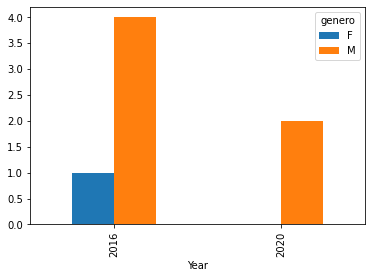

In [105]:
pd.crosstab(index=Michigan_muertes['Year'],
            columns=Michigan_muertes['genero']).plot(kind='bar')

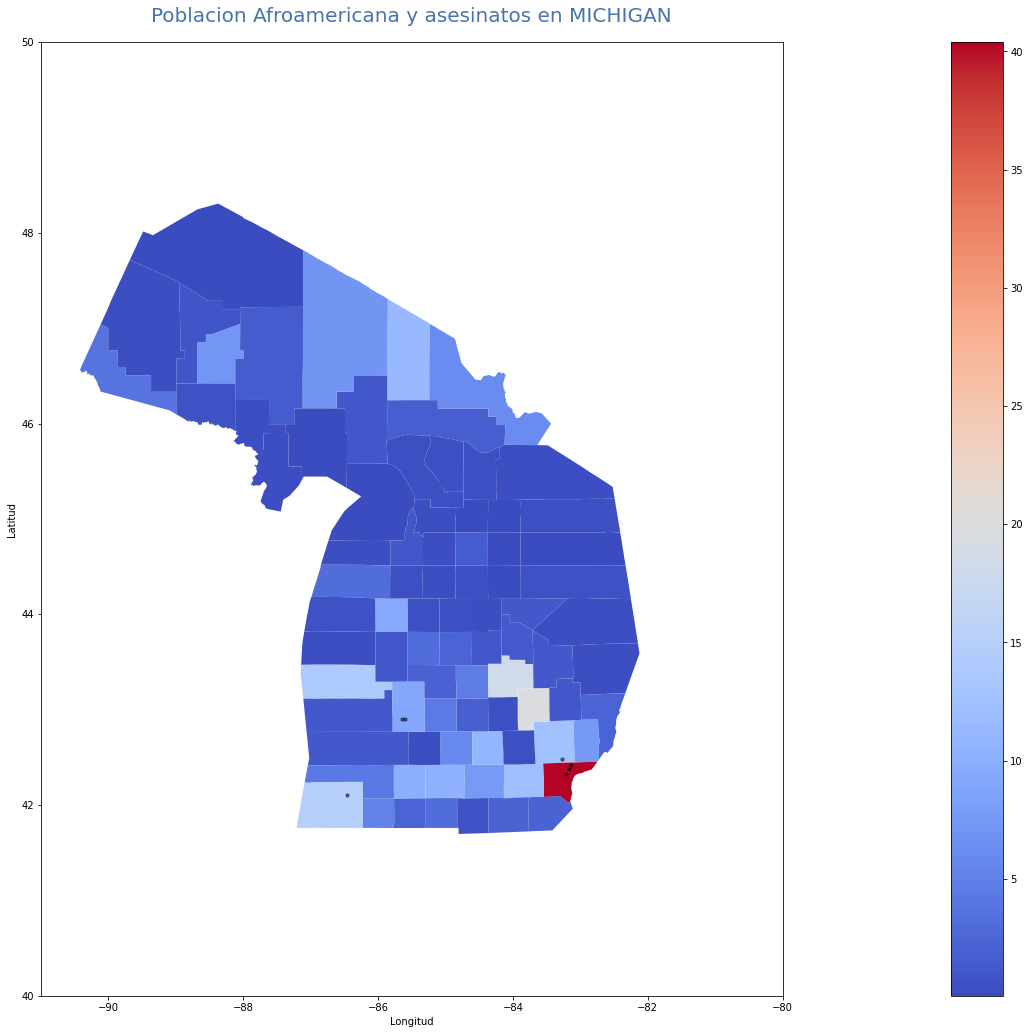

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.axis([-91, -80, 40, 50])
ax.set_title('Poblacion Afroamericana y asesinatos en MICHIGAN', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Michigan_muertes.plot(ax=ax,color="black",alpha=0.5,markersize=10,zorder=2)
Michigansoc.plot(column='african_american_population', cmap='coolwarm',ax=ax,
              legend=True, cax=cax)

plt.show();

PENSYLVANIA


In [107]:
Pennsylvania2016 = resultados.loc[resultados['st'] == ('PA')] 

In [108]:
Pennsylvania2016.head()

,st,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,fips,geometry,ganador
20,PA,22676.0,661.0,6849.0,68873,42005,"POLYGON ((-79.69130 40.89482, -79.68993 40.957...",Trump
44,PA,57168.0,3689.0,54820.0,280143,42049,"POLYGON ((-80.51942 41.97752, -80.51985 42.327...",Trump
105,PA,43937.0,1406.0,16724.0,147579,42107,"POLYGON ((-76.30717 40.80181, -76.28461 40.883...",Trump
168,PA,24418.0,907.0,9184.0,92907,42097,"POLYGON ((-76.85776 41.05563, -76.85781 41.062...",Trump
173,PA,25323.0,860.0,13933.0,91035,42073,"POLYGON ((-80.51901 40.99411, -80.51904 41.125...",Trump


In [109]:
Pennsylvania2016 = Pennsylvania2016.groupby(by="st").sum()

In [110]:
Pennsylvania2016['porc trump']=  Pennsylvania2016['votes16_trumpd']*100 / (Pennsylvania2016['votes16_trumpd'] + Pennsylvania2016['votes16_johnsong'] + Pennsylvania2016['votes16_clintonh'])

In [111]:
Pennsylvania2016

,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,porc trump
st,,,,,
PA,2912941.0,142653.0,2844705.0,12609468,49.369379


In [112]:
Pennsylvania2016_2020 = comparacion.loc[comparacion['NAME'] == ('Pennsylvania')] 

In [113]:
Pennsylvania2016_2020

,DEM,REP,LIB,%trump_2020,votes16_trumpd,votes16_johnsong,votes16_clintonh,total_population,%_trump_2016,NAME,geometry,Dif
PA,3455528.0,3373911.0,79312.0,48.835325,2912941.0,142653.0,2844705.0,12609468.0,49.369379,Pennsylvania,"POLYGON ((-80.51935 41.84956, -80.51938 41.850...",-0.534054


In [114]:
Pennsylvaniasoc = geomap.loc[geomap['st'].isin(['PA'])]
Pennsylvania_muertes = Ases_AfroA_año_elec.loc[Ases_AfroA_año_elec['state'].isin(['PA'])]

In [115]:
Pennsylvania_muertes

,id,name,date,motivo de muerte,armado,edad,genero,raza,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_geocoding_exact,geometry,Year
1073,1220,Bruce Kelley,2016-01-31,shot and Tasered,knife,37.0,M,AfroA,Wilkinsburg,PA,True,attack,Not fleeing,False,True,POINT (-79.88200 40.44200),2016
1094,1245,Shalamar Longer,2016-02-08,shot,gun,33.0,M,AfroA,Chester,PA,False,attack,Car,False,True,POINT (-75.40200 39.83600),2016
1196,1361,Keith Montgomery Jr.,2016-03-13,shot,gun,24.0,M,AfroA,Chester,PA,False,attack,Not fleeing,False,True,POINT (-75.36800 39.84500),2016
1272,1453,Quron Williams,2016-04-09,shot,gun,19.0,M,AfroA,Philadelphia,PA,False,attack,Foot,False,True,POINT (-75.14300 40.04000),2016
1581,1764,Earl Pinckney,2016-08-07,shot,knife,20.0,M,AfroA,Harrisburg,PA,True,other,Not fleeing,False,True,POINT (-76.89900 40.28200),2016
1690,1894,Nicholas Glenn,2016-09-17,shot,gun,25.0,M,AfroA,Philadelphia,PA,False,attack,Foot,False,True,POINT (-75.21700 39.95700),2016
1715,1919,Christopher Sowell,2016-09-28,shot,unarmed,32.0,M,AfroA,Philadelphia,PA,False,attack,Not fleeing,False,True,POINT (-75.16500 39.95300),2016
1820,2026,Darryl Chisholm,2016-11-07,shot,gun,31.0,M,AfroA,Philadelphia,PA,False,attack,Other,False,True,POINT (-75.14500 39.99900),2016
1838,2048,Rasheem Singletary,2016-11-15,shot,NaN,25.0,M,AfroA,York County,PA,False,other,Car,False,True,POINT (-76.72300 39.95400),2016
1908,2125,Kenneth Robledo,2016-12-12,shot,gun,28.0,M,AfroA,Philadelphia,PA,False,attack,Not fleeing,False,True,POINT (-75.07900 40.04200),2016


Cantidad de muertes en Pennsylvania durante años electorales

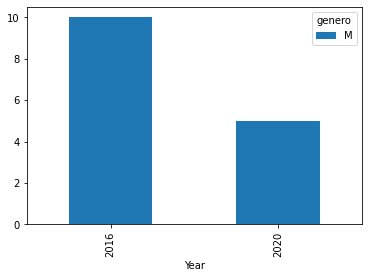

In [116]:
pd.crosstab(index=Pennsylvania_muertes['Year'],
            columns=Pennsylvania_muertes['genero']).plot(kind='bar')

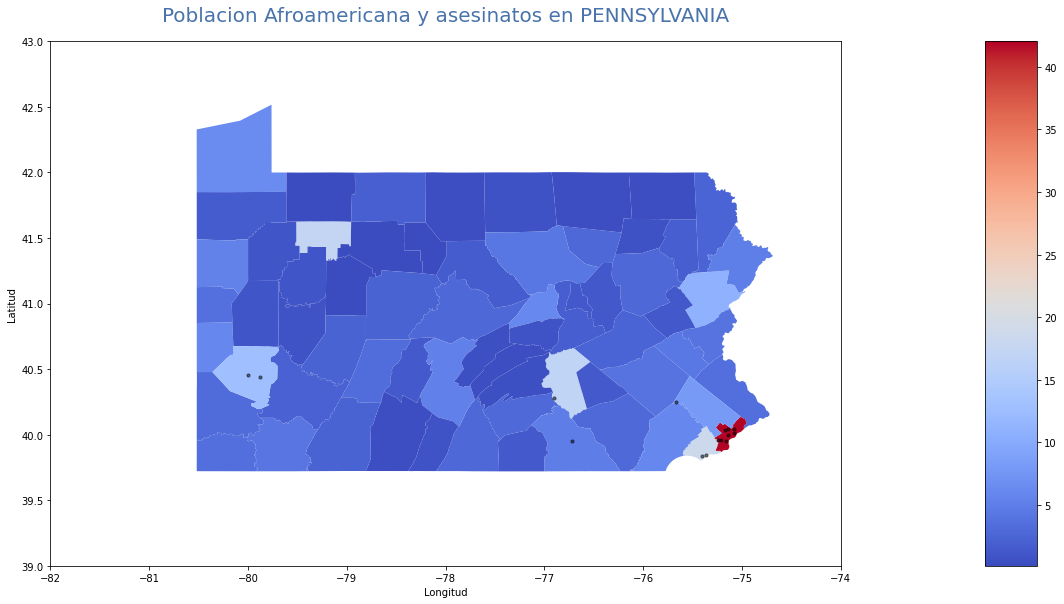

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.axis([-82, -74, 39, 43])
ax.set_title('Poblacion Afroamericana y asesinatos en PENNSYLVANIA', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

ax = Pennsylvania_muertes.plot(ax=ax,color="black",alpha=0.5,markersize=10,zorder=2)
Pennsylvaniasoc.plot(column='african_american_population', cmap='coolwarm',ax=ax,
              legend=True, cax=cax)

plt.show();

Luego de haber analizado los cuatro Estados seleccionados, comprobamos que la tasa de asesinatos fue mayor en el 2016 que en el 2020 en todos ellos. 

En cuanto a las elecciones presidenciales del año 2020, en los cuatro Estados obtuvo mayor cantidad de votos el candidato Biden siendo los resultados:  

Michigan: 50,6%;
Wisconsin: 49,6%;
Pennsylvania: 50%;
Georgia:49,5%.

El Estado de Georgia por ejemplo, ha ido evolucionando a lo largo de la historia de los Estados Unidos, pasando de ser un Estado bastión del Partido Demócrata, hasta convertirse en un punto de apoyo del Partido Republicano. Entre los años 1972 y 2016, Georgia fue ganada por demócratas;en apenas tres ocasiones, la última fue para Bill Clinton hace casi 30 años. Ciertos analistas políticos concluyen que podría haberse dado por el desaliento del Presidente saliente del voto por correo.

Por otro lado el Estado de Michigan, en el cual en las elecciones del año 2016 había obtenido más votos Trump, este año dio un revez resultando ganador Biden. 

Los cuatro Estados seleccionados son los que en gran parte han dado como ganador al candidato del partido democrata en las elecciones 2020. Tanto Pennsylvania, Wisconsin como Michigan han permitido recuperar al partido demócrata aquello que se denomina "el muro azul", los cuales se encuentran entre los 18 Estados que durante 6 elecciones presidenciales consecutivas (1992-2012) ha ganado el partido demócrata. 

Conforme lo analizado, se podría determinar que la cantidad de asesinatos cometidos no se correlacionan con los resultados electorales del año 2020. 

Sin embargo, podriamos preguntarnos si la influencia de las redes sociales y el rumbo discursivo de los actores podrían haber incidido en las elecciones del período 2020. 
